# Assignment 1: Wrangling
## Q1 and Q2
#### Hanna Svenson (jda6qt)

**Q1. Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.**

1. Read the abstract. What is this paper about? 

This paper talks about data tidying, and its importance in making datasets easy to work with. Each variable is a column, each observation a row, and each tupe of observational unit a table. The paper will also explore the advantages with support from a case study

 2. Read the introduction. What is the "tidy data standard" intended to accomplish?
 
It aims to standardized how data sets are organized and cleaned. This will make initial data cleaning easier as it gives a good starting guide, it will create consistency across data sets to some extent, and it will make analysis and the implememtation of data tools down the line easier. 

3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence seems to mean that data sets share the same general components (for example variables, observations), but there are so many different ways that this data can be disorganized and have problems.

The second sentence means that when taking a view at one data set, it is easy to spot variables and observations as they will usually be in columns and rows. However, when taking a broader view they are harder to define, perhaps because their meanings are closely tied to what context they are in. 

4. Read Section 2.2. How does Wickham define values, variables, and observations?

A value is a data point, usually a number or string, and belongs to a variable and observation. 
A variable is a set of values measuring the same attribute.
An observation is the set of values from the same unit/source across the attributes.

5. How is "Tidy Data" defined in section 2.3?

It is a standard of structuring data such that each variable is a column, each observation is a row, and each observational unit forms a table. 

6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The five problems: column headers are values, multiple variables stored in 1 column, variables are stored in both rows and columns instead of just columns, multiple observational unit tupes are in the same table, one observational unit is stored in multiple tables. 

Table 4 is messy, because it has income ranges in the column headers which should be values instead of variables.

Melting a data set is the process of turning columns into rows. 1 column will be converted into 2, one for the heading and one for the value. 

7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because the observational units (days of the month) are spread across columns, and variables (tmin and tmax) are in rows. Table 12 is molten because it addresses these issues by making each date (observation) a row and moves the temperature values to the columns. 

8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

Chicken-and-egg in this context means that tidy data is only as useful as the tools that you use on it, and vice versa. Trying to improve only one aspect at a time will limit your overall improvement, as these two things are so closely linked that one will hold the other back. Wickham hopes that the tidy framework will be built on to create better frameworks and better tools. 

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**2.1 Explanation**

First I looked at unique price values to see what happens to larger prices. When I first tried coercion, I saw that the max value left on the prices was 999, so I determined that once a value exceeded this there were issues. I concluded that I should remove the commas from all the price values, and then try coercion again. This increased the max value to 10000, and there were no more missing values (values lost from reading these values as numbers).

See the 2 code blocks below.

In [1]:
## 2.1

import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
print(df['Price'].unique())

var = 'Price'
print('Before coercion: \n', df[var].describe(),'\n') # The age variable is not read by Pandas as a number

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



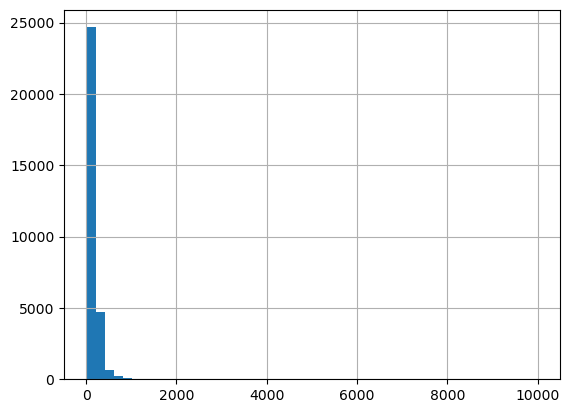

In [2]:
## 2.1 cont.  the cleaning
df[var] = df[var].str.replace(',', '')

# How to coerce a variable to numeric:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df['price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
df['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['price_nan']),'\n') # How many missing values are there?

**2.2 Explanation**

First I wanted to see what the different categories in the data looked like, and how many reports those had. Then I could determine what categories I wanted to group together. 
After seeing online that a Sea Disaster is an event involving 1 or more ships, I decided to group that category and all boat-related ones under the more general Watercraft category. 
Next, I decided to group the unconfirmed/questionable/unverified/under investigation categories under Invalid, because if the type could not be confirmed, then I did not want it to be considered a valid category on its own. However, I did not remove all the values entirely because I thought it could be informative to see how many of all the reports were not considered valid.

See 2 code blocks below.

In [3]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

dfS = pd.read_csv('./data/sharks.csv',low_memory=False)
varS= 'Type'
print(dfS[varS].value_counts(),'\n')

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [4]:
dfS[varS]=dfS[varS].replace(['Boating', 'Boat', 'Boatomg', 'Sea Disaster'], 'Watercraft')
dfS[varS]=dfS[varS].replace(['Questionable', 'Unconfirmed', 'Unverified', 'Under investigation'], 'Invalid')
print(dfS['Type'].value_counts())

Unprovoked    4716
Provoked       593
Watercraft     583
Invalid        565
Name: Type, dtype: int64


**2.3 Explanation**

Based on the codebook, we see that 0 means Not Released, 1 means Released, and 9 means Unclear. Viewing the value counts show that these are the only 3 values present in the data set anyways, so this is easy to handle. The question instructs to remove missing values, so this is talking about the cases with a value of 9, so I use the replace function to replace the sentences of type 9 with np.nan. The 1 and 0 are explanatory enough for release vs unreleased, so I am leaving the values as is. 

In [5]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
dfV = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
varV = 'WhetherDefendantWasReleasedPretrial'

print(dfV[varV].value_counts(),'\n')

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [6]:
dfV[varV]=dfV[varV].replace(9, np.nan)
print(dfV[varV].value_counts(),'\n')

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



**2.4 Explanation**

Looking at the overall unique values for sentence length shows that the empty string ' ' is in there 9053 times. Then looking at the lengths by sentence type, we see that these all occur at type 4 and 9. 4 means pending/dismissed/deferred/etc, which would be no sentence, so we will assign these values to be 0. 9 means Not applicable (e.g., disposition record not found, or unknown), so we get rid of those during the coercion. In the end, only 274 values (which were type 9) were "lost" in the coercion. 

In [7]:
s_length = 'ImposedSentenceAllChargeInContactEvent'
s_type = 'SentenceTypeAllChargesAtConvictionInContactEvent'
print(dfV[s_length].describe(), '\n')
print(dfV[s_type].describe(), '\n')
print(dfV[s_length].unique(), '\n')
print(dfV[s_type].unique(),'\n')

print((dfV[s_length] == ' ').sum())


count     22986
unique      484
top            
freq       9053
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

count    22986.000000
mean         1.901549
std          1.951090
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max          9.000000
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: float64 

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711

In [8]:
df_filtered = dfV[dfV[s_type] == 4]
print(df_filtered[s_length].unique())  #sentences where type == 4

print((df_filtered[s_length] == ' ').sum())

[' ']
8779


In [9]:
dfV.loc[ dfV[s_type] == 4, s_length] = 0 # No bond posted
# print(dfV[s_length].unique(), '\n')

print((dfV[s_length] == ' ').sum())


274


In [10]:
df_filtered = dfV[dfV[s_type] == 9]
print(df_filtered[s_length].unique())  #sentences where type == 4
print((df_filtered[s_length] == ' ').sum())


[' ']
274


In [11]:
dfV[s_length] = pd.to_numeric(dfV[s_length], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
dfV['s_length_nan'] = dfV[s_length].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', dfV[s_length].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(dfV['s_length_nan']),'\n') # How many missing values are there?


After coercion: 
 count    22712.000000
mean        12.207737
std         50.725352
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 

Total Missings: 
 274 

